# POSTTEST 6
oleh [Andi Rachmad Triandika Rusli](https://github.com/andirchmd) (2109106132)

## Pembuatan Model *Deep Neural Network* (DNN)


---

Dataset: [PRDECT-ID: Indonesian Emotion Classification | Kaggle](https://www.kaggle.com/datasets/jocelyndumlao/prdect-id-indonesian-emotion-classification/data)

Library yang dipakai

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Baca dan simpan datasetnya dengan nama `df`

In [19]:
df = pd.read_csv("PRDECT-ID Dataset.csv")
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


### **1. Sequential Model**
---

#### **Persiapan Data**

Sebelum melatih model, kita perlu memastikan data telah diproses dan siap untuk digunakan untuk train model

**Label Encoding**: Mengubah label sentimen dari kategorikal (seperti "Positive" dan "Negative") menjadi numerik (0 dan 1).

In [20]:
le = LabelEncoder()
df['Sentiment_num'] = le.fit_transform(df['Sentiment'])

**Pemilihan Fitur**: Disini saya hanya memilih fitur numerik dari dataset saja.

In [21]:
X = df[['Price', 'Customer Rating']]
y = df['Sentiment_num']

**Standardisasi**: Mengubah fitur agar memiliki rata-rata 0 dan standar deviasi 1, yang akan mempercepat proses pelatihan.

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Pembagian Data**: Data dibagi menjadi set train dan test. Set train digunakan untuk melatih model dan set test digunakan untuk evaluasi.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### **Membuat Model DNN**

Mendefinisikan arsitektur dari Deep Neural Network.

- Model ini terdiri dari tiga layer: dua layer dengan fungsi aktivasi ReLU dan satu layer output dengan fungsi aktivasi sigmoid (karena ini adalah masalah klasifikasi biner).
- Dropout ditambahkan untuk menghindari overfitting, dengan memutus sebagian koneksi selama proses pelatihan.

In [24]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8705 (34.00 KB)
Trainable params: 8705 (34.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **Melatih Model**

- Model dilatih menggunakan data pelatihan.
- Selama pelatihan berjalan akan memvalidasi model juga dengan subset dari data pelatihan (20% dari data pelatihan) untuk memantau hasil train model pada data yang belum pernah dilihat selama pelatihan.

In [25]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
108/108 [==============================] - 2s 7ms/step - loss: 0.2671 - accuracy: 0.9384 - val_loss: 0.0605 - val_accuracy: 0.9838
Epoch 2/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.9823 - val_loss: 0.0495 - val_accuracy: 0.9873
Epoch 3/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9826 - val_loss: 0.0493 - val_accuracy: 0.9873
Epoch 4/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0626 - accuracy: 0.9832 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 5/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9823 - val_loss: 0.0473 - val_accuracy: 0.9873
Epoch 6/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9835 - val_loss: 0.0469 - val_accuracy: 0.9873
Epoch 7/50
108/108 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.9835 - val_loss: 0.0488 - val_accuracy: 0.9861
Epoch 

#### **Evaluasi Model**

Setelah pelatihan selesai, kita mengevaluasi kinerja model pada data pengujian untuk mendapatkan gambaran tentang seberapa baik model bekerja pada data yang benar-benar belum pernah dilihat.

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

34/34 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9870
Test Accuracy: 0.9870


#### **Plot Metrik**

- Grafik pertama menunjukkan perubahan akurasi selama setiap epoch untuk set pelatihan dan validasi.
- Grafik kedua menunjukkan bagaimana loss berubah selama setiap epoch.

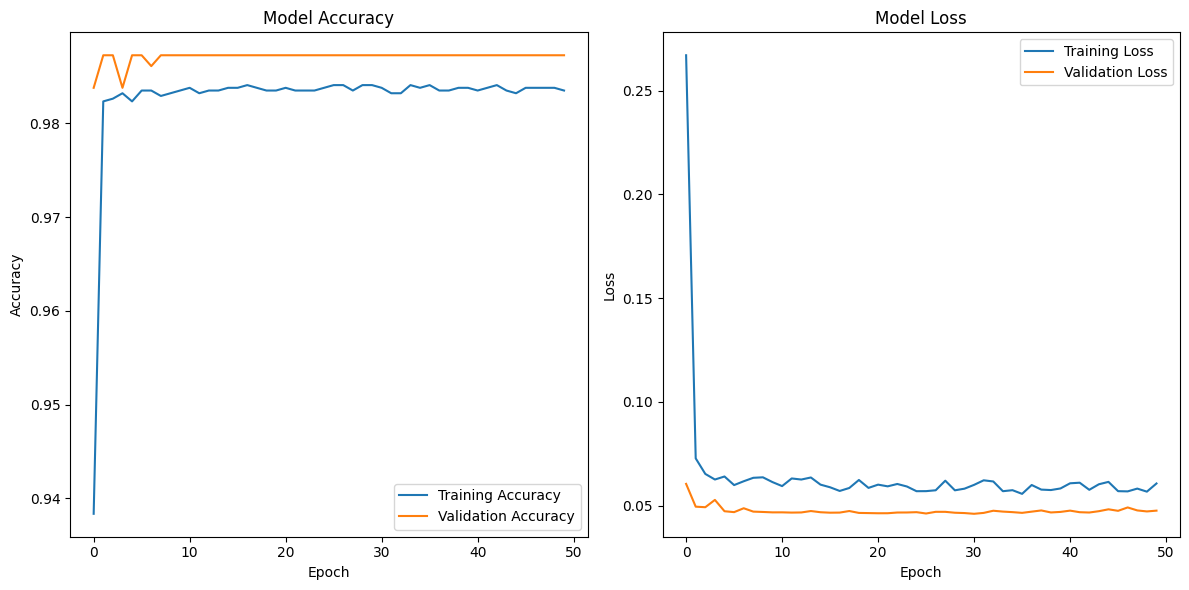

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **2. Sequential Model NLP**
---

#### **Persiapan Data**
Sebelum melatih model, kita perlu memastikan data telah diproses dan siap untuk digunakan untuk train model

**Pembagian Data**: Membagi dataset menjadi set train dan test.

In [28]:
X = df["Customer Review"]
y = df["Sentiment_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Tokenisasi**: Mengonversi setiap kata dalam ulasan ke dalam sebuah token numerik.

In [29]:
max_words = 10000  # jumlah kata maksimum
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

**Padding**: Memastikan bahwa setiap ulasan memiliki panjang yang sama dengan menambahkan padding jika diperlukan.

In [30]:
max_length = 100  # panjang maksimum dari setiap sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, truncating="post", padding="post")

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, truncating="post", padding="post")

#### **Membuat Model DNN untuk NLP**

Mulai buat arsitektur Deep Neural Network untuk analisis sentimen.

- Model dimulai dengan layer embedding, yang akan mengonversi token kata menjadi vektor.
- Kemudian layer dense yang akan memproses informasi tersebut dan menghasilkan prediksi.

In [31]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 24)                38424     
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 198449 (775.19 KB)
Trainable params: 198449 (775.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **Melatih Model**

Dengan struktur model yang telah ditentukan, langkah selanjutnya adalah melatih model dengan data pelatihan.

In [32]:
num_epochs = 10
history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test))

Epoch 1/10
135/135 [==============================] - 4s 7ms/step - loss: 0.5733 - accuracy: 0.6928 - val_loss: 0.3412 - val_accuracy: 0.8852
Epoch 2/10
135/135 [==============================] - 1s 5ms/step - loss: 0.1817 - accuracy: 0.9440 - val_loss: 0.1761 - val_accuracy: 0.9333
Epoch 3/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0774 - accuracy: 0.9780 - val_loss: 0.1522 - val_accuracy: 0.9417
Epoch 4/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0389 - accuracy: 0.9910 - val_loss: 0.1531 - val_accuracy: 0.9417
Epoch 5/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0216 - accuracy: 0.9968 - val_loss: 0.1525 - val_accuracy: 0.9481
Epoch 6/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0117 - accuracy: 0.9988 - val_loss: 0.1528 - val_accuracy: 0.9435
Epoch 7/10
135/135 [==============================] - 1s 5ms/step - loss: 0.0068 - accuracy: 0.9995 - val_loss: 0.1617 - val_accuracy: 0.9472
Epoch 

#### **Evaluasi Model**

Setelah pelatihan selesai, kita mengevaluasi kinerja model pada data pengujian.

In [33]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

34/34 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9417
Test Accuracy: 0.9417


#### **Plot Metrik**

- Grafik pertama menunjukkan perubahan akurasi selama setiap epoch untuk set pelatihan dan validasi.
- Grafik kedua menunjukkan bagaimana loss berubah selama setiap epoch.

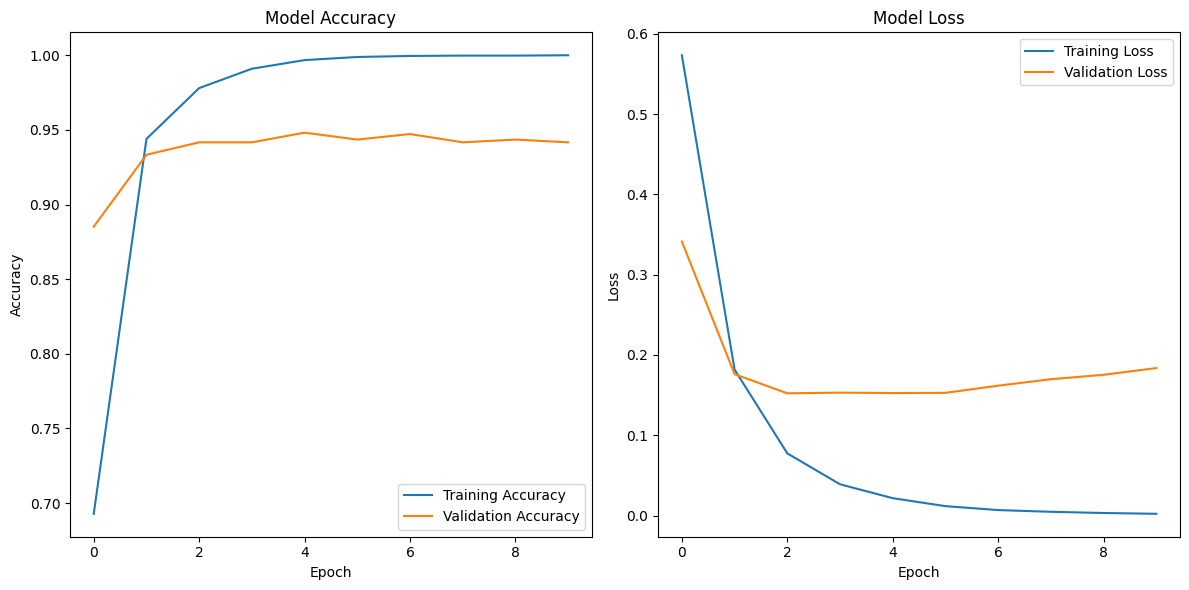

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
